In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from datetime import datetime
import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
df = pd.read_csv('ventas-por-factura.csv')

In [3]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,"1488,00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [5]:
df['Monto'] = df['Monto'].str.replace(',', '.')
df['Monto'] = df['Monto'].astype(float)

In [6]:
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'])
df['hour'] = df['Fecha de factura'].dt.hour
df['year'] = df['Fecha de factura'].dt.year
df['weekday'] = df['Fecha de factura'].dt.day_name()
df['month'] = df['Fecha de factura'].dt.month_name()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N° de factura     25953 non-null  object        
 1   Fecha de factura  25953 non-null  datetime64[ns]
 2   ID Cliente        22229 non-null  float64       
 3   País              25953 non-null  object        
 4   Cantidad          25953 non-null  int64         
 5   Monto             25953 non-null  float64       
 6   hour              25953 non-null  int32         
 7   year              25953 non-null  int32         
 8   weekday           25953 non-null  object        
 9   month             25953 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 1.8+ MB


In [8]:
df.isna().sum()

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
hour                   0
year                   0
weekday                0
month                  0
dtype: int64

In [9]:
devoluciones = (df['Cantidad'] < 0).sum()
devoluciones

np.int64(5179)

In [10]:
m_devuelto = (df['Monto'] < 0).sum()
m_devuelto

np.int64(3843)

In [11]:
df.describe()

,Fecha de factura,ID Cliente,Cantidad,Monto,hour,year
count,25953,22229.000000,25953.000000,25953.000000,25953.000000,25953.000000
mean,2021-06-27 02:12:28.607097600,15238.289892,199.474049,375.657552,12.738026,2020.921936
min,2020-12-01 08:26:00,12346.000000,-80995.000000,-168469.600000,6.000000,2020.000000
25%,2021-03-27 12:36:00,13755.000000,6.000000,11.550000,11.000000,2021.000000
50%,2021-07-04 15:46:00,15136.000000,100.000000,207.050000,13.000000,2021.000000
75%,2021-10-07 14:04:00,16746.000000,240.000000,408.660000,15.000000,2021.000000
max,2021-12-09 12:50:00,18287.000000,80995.000000,168469.600000,20.000000,2021.000000
std,NaN,1732.981685,1107.075809,2009.042459,2.472271,0.268278


In [12]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,16,2021,Tuesday,March
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,11,2021,Thursday,November
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,11,2021,Tuesday,October
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,12,2021,Tuesday,April
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,15,2021,Wednesday,October
...,...,...,...,...,...,...,...,...,...,...
25948,C556518,2021-06-13 10:53:00,16794.0,United Kingdom,-2,-12.70,10,2021,Sunday,June
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,10,2021,Thursday,May
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,13,2021,Wednesday,November
25951,550122,2021-04-14 12:39:00,12931.0,United Kingdom,1176,1488.00,12,2021,Wednesday,April


Se han puesto los datos en el tipo correcto y se ha visto que hay más de 3.000 Nans en la columna de Id del cliente y 5100 negativos en la columna cantidad que son devoluciones. Hay que comprobar porque hay nans en los id de los clientes y si todas las devoluciones son correctas.( las vamos a dar como correctas)

In [13]:
df['N° de factura'].value_counts(dropna=False)

N° de factura
543171    2
552000    2
544926    2
543777    2
549245    2
         ..
550159    1
541692    1
556751    1
569849    1
548458    1
Name: count, Length: 25900, dtype: int64

In [14]:
duplicados = df[df['N° de factura'].duplicated(keep=False)]
duplicados

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
376,542806,2021-02-01 11:20:00,12836.0,United Kingdom,254,798.99,11,2021,Monday,February
654,546388,2021-03-11 13:42:00,NaN,United Kingdom,548,2472.63,13,2021,Thursday,March
1348,542806,2021-02-01 11:19:00,12836.0,United Kingdom,6,47.70,11,2021,Monday,February
1377,541809,2021-01-21 14:58:00,NaN,United Kingdom,249,1343.71,14,2021,Thursday,January
1568,C581384,2021-12-08 13:06:00,17673.0,United Kingdom,-2,-6.90,13,2021,Wednesday,December
...,...,...,...,...,...,...,...,...,...,...
24929,546986,2021-03-18 12:55:00,14194.0,United Kingdom,76,213.98,12,2021,Thursday,March
25053,553556,2021-05-17 16:49:00,17530.0,United Kingdom,34,81.50,16,2021,Monday,May
25094,550333,2021-04-17 14:05:00,15410.0,United Kingdom,111,258.85,14,2021,Saturday,April
25610,542217,2021-01-26 12:35:00,14606.0,United Kingdom,12,7.80,12,2021,Tuesday,January


In [15]:
df = df.drop_duplicates(subset='N° de factura', keep='first')

In [16]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,16,2021,Tuesday,March
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,11,2021,Thursday,November
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,11,2021,Tuesday,October
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,12,2021,Tuesday,April
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,15,2021,Wednesday,October
...,...,...,...,...,...,...,...,...,...,...
25948,C556518,2021-06-13 10:53:00,16794.0,United Kingdom,-2,-12.70,10,2021,Sunday,June
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,10,2021,Thursday,May
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,13,2021,Wednesday,November
25951,550122,2021-04-14 12:39:00,12931.0,United Kingdom,1176,1488.00,12,2021,Wednesday,April


In [17]:
 # Calcular los cuartiles y el rango intercuartil (IQR)
Q1 = df['Cantidad'].quantile(0.25)
Q3 = df['Cantidad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['Cantidad'] < lower_bound) | (df['Cantidad'] > upper_bound)]
outliers

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
12,537823,2020-12-08 14:25:00,NaN,United Kingdom,1484,6073.71,14,2020,Tuesday,December
27,576083,2021-11-14 08:22:00,17404.0,Sweden,1060,1238.48,8,2021,Sunday,November
67,577783,2021-11-21 16:20:00,18139.0,United Kingdom,1644,2786.40,16,2021,Sunday,November
76,C569552,2021-10-04 17:44:00,14533.0,United Kingdom,-1200,-84.00,17,2021,Monday,October
95,569695,2021-10-05 15:35:00,16843.0,United Kingdom,938,993.88,15,2021,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...
25914,561647,2021-07-28 15:20:00,13340.0,United Kingdom,1764,3301.38,15,2021,Wednesday,July
25917,559052,2021-07-05 16:53:00,NaN,United Kingdom,1562,4178.58,16,2021,Monday,July
25920,552181,2021-05-06 13:36:00,17381.0,United Kingdom,820,1484.40,13,2021,Thursday,May
25942,541247,2021-01-16 12:44:00,12989.0,United Kingdom,648,810.00,12,2021,Saturday,January


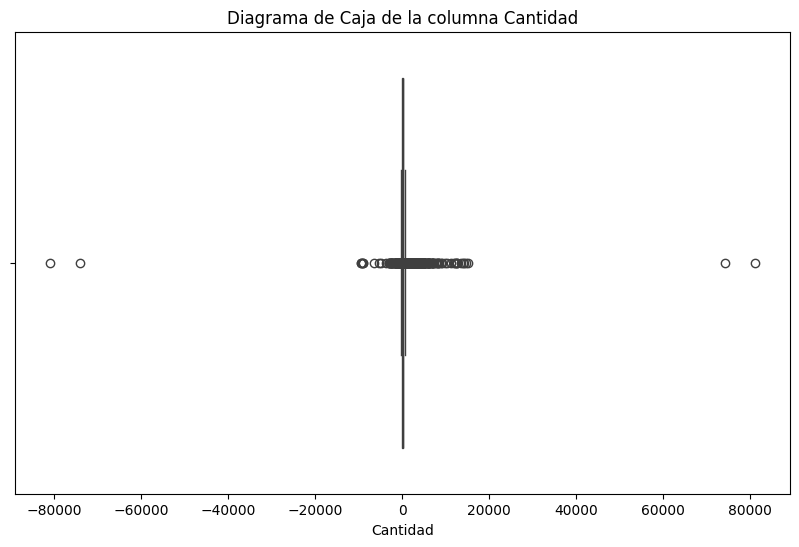

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cantidad'])
plt.title('Diagrama de Caja de la columna Cantidad')
plt.show()

In [19]:
df[df['Cantidad'] >= 7000]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
240,562789,2021-08-09 13:50:00,14646.0,Netherlands,7807,12341.21,13,2021,Monday,August
1192,553546,2021-05-17 15:42:00,12415.0,Australia,8268,11924.80,15,2021,Monday,May
1956,545475,2021-03-03 10:59:00,12415.0,Australia,10272,16726.84,10,2021,Wednesday,March
3330,556267,2021-06-09 19:33:00,13694.0,United Kingdom,9811,3027.31,19,2021,Wednesday,June
4548,572035,2021-10-20 12:03:00,14646.0,Netherlands,13392,20277.92,12,2021,Wednesday,October
5488,563076,2021-08-11 16:12:00,14646.0,Netherlands,14730,19150.66,16,2021,Wednesday,August
6347,574941,2021-11-07 17:42:00,NaN,United Kingdom,14149,52940.94,17,2021,Sunday,November
10802,576365,2021-11-14 17:55:00,NaN,United Kingdom,13956,50653.91,17,2021,Sunday,November
12491,578841,2021-11-25 15:57:00,13256.0,United Kingdom,12540,0.00,15,2021,Thursday,November
13136,581483,2021-12-09 09:15:00,16446.0,United Kingdom,80995,168469.60,9,2021,Thursday,December


In [20]:
df[df['Cantidad'] <= -6000]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
764,C536757,2020-12-02 14:23:00,15838.0,United Kingdom,-9360,-280.80,14,2020,Wednesday,December
1457,C541433,2021-01-18 10:17:00,12346.0,United Kingdom,-74215,-77183.60,10,2021,Monday,January
5796,556691,2021-06-14 10:37:00,NaN,United Kingdom,-9600,0.00,10,2021,Monday,June
10166,C581484,2021-12-09 09:27:00,16446.0,United Kingdom,-80995,-168469.60,9,2021,Thursday,December
10455,C550456,2021-04-18 13:08:00,15749.0,United Kingdom,-9014,-22998.40,13,2021,Sunday,April
21554,C570556,2021-10-11 11:10:00,16029.0,United Kingdom,-6480,-11816.64,11,2021,Monday,October
22346,556690,2021-06-14 10:37:00,NaN,United Kingdom,-9600,0.00,10,2021,Monday,June
23949,556687,2021-06-14 10:36:00,NaN,United Kingdom,-9058,0.00,10,2021,Monday,June


Se ha comprobado que hay duplicados en el Nº de factura y se han borrado los duplicados. Se comprobaron los outliers y no parece que sean errores, por lo que se da todo como correcto.

In [25]:
df['year'].value_counts(dropna=False)

year
2021    23875
2020     2025
Name: count, dtype: int64

In [27]:
df = df[df['year'] != 2020]
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,hour,year,weekday,month
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,16,2021,Tuesday,March
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,11,2021,Thursday,November
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,11,2021,Tuesday,October
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,12,2021,Tuesday,April
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,15,2021,Wednesday,October
...,...,...,...,...,...,...,...,...,...,...
25947,C553519,2021-05-17 14:16:00,18218.0,United Kingdom,-2,-9.90,14,2021,Monday,May
25948,C556518,2021-06-13 10:53:00,16794.0,United Kingdom,-2,-12.70,10,2021,Sunday,June
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,10,2021,Thursday,May
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,13,2021,Wednesday,November


Se borran las facturas del año 2020 que no pertenecen para este analisis

In [50]:
df["unidad precio"] = df["Monto"] / df["Cantidad"]
df['ID Cliente'] = df['ID Cliente'].fillna('desconocido')

Creamos una columna para ver a que precio se vende la unidad y a los clientes sin ID los cambiamos a desconocidos.

# GRAFICOS

In [23]:
px.histogram(data_frame = df,
             x          = "hour",
             y  = "Cantidad")

Se comprueba que las horas que mas se vende es entre las 10 y las 15

In [29]:
fig = px.sunburst(data_frame = df,
                  values     = "Cantidad",
                  path       = ["month"],
                  hover_name = "Cantidad")

fig.update_traces(textinfo = "label+percent parent")

fig

Se puede observar que los meses de mayores ventas son septiembre, octubre, noviembre y que el resto del año es similar aunque con un ligero aumento a medida que avanzan los meses.

In [30]:
px.histogram(data_frame = df,
             x          = "País",
             y  = "Cantidad")

Se observa la cantidad vendida a cada pais, donde Reino Unido es el pais que mas cantidad se le ha vendido, seguido de Holanda Y Irlanda.

In [31]:
px.histogram(data_frame = df,
             x          = "País",
             y  = "Monto")

Aqui podemos observar lo facturado a cada pais siendo Reino Unido donde mas se factura seguido de Holanda y Irlanda.

In [36]:
df['ID Cliente'] = df['ID Cliente'].astype(str)
df_cliente = df.groupby('ID Cliente')['Monto'].sum().reset_index()
top_10_clientes = df_cliente.sort_values(by='Monto', ascending=False).head(10)
top_10_clientes

,ID Cliente,Monto
4244,nan,1231235.78
1663,14646.0,270897.14
4111,18102.0,228603.88
3659,17450.0,185453.33
1851,14911.0,125610.59
55,12415.0,123725.45
1312,14156.0,113069.44
3700,17511.0,79509.80
3118,16684.0,62778.68
983,13694.0,59768.06


In [37]:
px.histogram(data_frame = top_10_clientes,
             x          = "ID Cliente",
             y  = "Monto")

Se observa lo facturado a los 10 primeros clientes. El primero es la suma de todos los nans que no le sale el ID

In [42]:
precio_max_por_cliente = df.groupby('ID Cliente')['unidad precio'].max().reset_index()

# Ordenar por 'unidad precio' en orden descendente y seleccionar los 10 principales
top_10_precios = precio_max_por_cliente.sort_values(by='unidad precio', ascending=False).head(10)

In [44]:
fig = px.bar(top_10_precios, x='ID Cliente', y='unidad precio',
             title='Top 10 Clientes con los Precios de Unidad más Altos',
             labels={'ID Cliente': 'ID Cliente', 'unidad precio': 'Precio Unidad'},
             text='unidad precio')

fig.show()

Estos son los 10 clientes a los que se les factura la unidad al precio mas alto

In [47]:
precio_min_por_cliente = df.groupby('ID Cliente')['unidad precio'].min().reset_index()
top_10_precios_bajos = precio_min_por_cliente.sort_values(by='unidad precio').head(10)

In [48]:
fig = px.bar(top_10_precios_bajos, x='ID Cliente', y='unidad precio',
             title='Top 10 Clientes con los Precios de Unidad más Bajos',
             labels={'ID Cliente': 'ID Cliente', 'unidad precio': 'Precio Unidad'},
             text='unidad precio')

fig.show()

Son los clientes a los que se les factura el precio de la unidad mas bajo, varios tienen importe 0 por lo que hay que comprobar si es un error o son entregas de muestras o reposiciones por roturas.